In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

#### Problem Statement 
In today's competitive business environment, retaining skilled employees is critical for organizational success. High employee turnover can lead to increased costs, loss of productivity, and a negative impact on team morale. This dataset, containing various attributes related to employees such as age, job role, income, education, job satisfaction, and overtime, provides an opportunity to analyze and understand the factors influencing employee attrition. 
        To address this issue, we can use supervised machine learning with classification models to predict employee attrition.

Now We will importing the dataset

In [2]:
data_file=pd.read_csv('E:\Yaminee\Data Trained\Yaminee Tiwari\Project\Dataset for practice\ibm-hr-analytics-employee-attrition-performance\WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
#Showing first 5 top rows
data_file.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
#Showing botton 5 rows
data_file.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [5]:
data_file.shape

(1470, 35)

In [6]:
#Showing Columns
data_file.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

- In Dataset 1470 rows and 35 columns are present 
- The attribute feature of 
1. **Age**: The age of the employee.
2. **Attrition**: Indicates whether the employee has left the company (Yes/No).
3. **BusinessTravel**: Frequency of business travel (e.g., Rarely, Frequently, No Travel).
4. **DailyRate**: Daily wage rate of the employee.
5. **Department**: The department where the employee works (e.g., Sales, Research & Development, Human Resources).
6. **DistanceFromHome**: Distance in miles from the employee's home to the workplace.
7. **Education**: Level of education attained by the employee (e.g., 1=Below College, 2=College, 3=Bachelor, 4=Master, 5=Doctorate).
8. **EducationField**: The field of education (e.g., Life Sciences, Medical, Marketing).
9. **EmployeeCount**: The count of employees (usually a constant value like 1, potentially used as an identifier).
10. **EmployeeNumber**: A unique identifier assigned to each employee.
11. **EnvironmentSatisfaction**: Satisfaction with the work environment (1=Low, 2=Medium, 3=High, 4=Very High).
12. **Gender**: Gender of the employee (Male/Female).
13. **HourlyRate**: Hourly wage rate of the employee.
14. **JobInvolvement**: Level of involvement in the job (1=Low, 2=Medium, 3=High, 4=Very High).
15. **JobLevel**: Job level or position within the company hierarchy (e.g., 1=Entry Level, 2=Mid Level, 3=Senior Level).
16. **JobRole**: Specific role or title of the employee (e.g., Sales Executive, Research Scientist).
17. **JobSatisfaction**: Satisfaction with the job (1=Low, 2=Medium, 3=High, 4=Very High).
18. **MaritalStatus**: Marital status of the employee (e.g., Single, Married, Divorced).
19. **MonthlyIncome**: Monthly income of the employee.
20. **MonthlyRate**: Monthly wage rate of the employee.
21. **NumCompaniesWorked**: Number of companies the employee has worked for in the past.
22. **Over18**: Indicates if the employee is over 18 years old (usually a constant value like 'Y').
23. **OverTime**: Indicates if the employee works overtime (Yes/No).
24. **PercentSalaryHike**: Percentage increase in salary over the last year.
25. **PerformanceRating**: Performance rating of the employee (1=Low, 2=Good, 3=Excellent, 4=Outstanding).
26. **RelationshipSatisfaction**: Satisfaction with relationships at work (1=Low, 2=Medium, 3=High, 4=Very High).
27. **StandardHours**: Standard number of working hours (usually a constant value like 40 hours/week).
28. **StockOptionLevel**: Level of stock options granted to the employee (0=None, 1=Low, 2=Medium, 3=High).
29. **TotalWorkingYears**: Total number of years the employee has been working.
30. **TrainingTimesLastYear**: Number of training sessions attended by the employee in the last year.
31. **WorkLifeBalance**: Work-life balance satisfaction (1=Bad, 2=Good, 3=Better, 4=Best).
32. **YearsAtCompany**: Number of years the employee has been with the current company.
33. **YearsInCurrentRole**: Number of years the employee has been in their current role.
34. **YearsSinceLastPromotion**: Number of years since the employee's last promotion.
35. **YearsWithCurrManager**: Number of years the employee has been working with their current manager.

In [7]:
data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

##### From above we can observed that
- Object Data type column :-'Attrition', 'BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus', 
       'Over18' and  'OverTime'
- Integer Data type columns:-'Age','DailyRate','DistanceFromHome', 'Education',  'EmployeeCount','EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate','JobInvolvement', 'JobLevel','JobSatisfaction','MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked','PercentSalaryHike', 'PerformanceRating','RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel','TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion' and 'YearsWithCurrManager'

In [8]:
#checking null values
data_file.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

No null value is present . We will show this with the help of heatmap

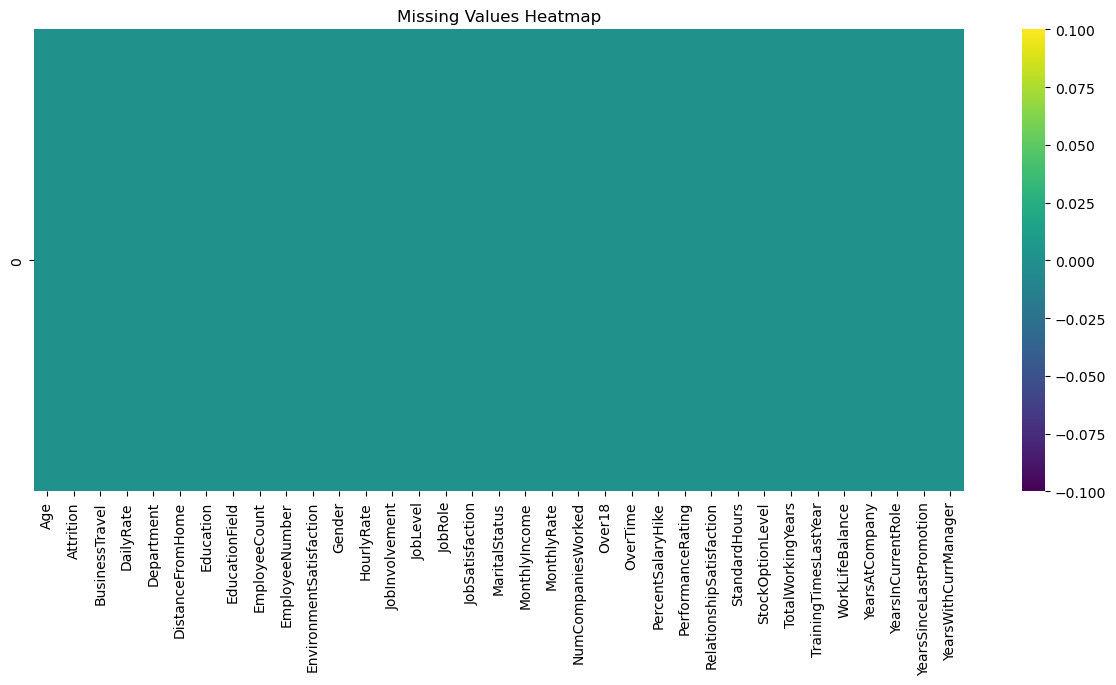

In [9]:
# Plot heatmap of missing values
plt.figure(figsize=(15, 6))
sns.heatmap(data_file.isnull().sum().to_frame().T, cmap='viridis', cbar=True)
plt.title('Missing Values Heatmap')
plt.show()

In [10]:
#checking duplicate values
data_file.duplicated().sum()

0

No duplicate value present 

In [11]:
#checking unique values
for values in data_file.columns:
  print(values,'=>',data_file[values].nunique(),'\n')  
  print(values,'=>',data_file[values].unique())  
  print('\n') 

Age => 43 

Age => [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]


Attrition => 2 

Attrition => ['Yes' 'No']


BusinessTravel => 3 

BusinessTravel => ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']


DailyRate => 886 

DailyRate => [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 13

Now we will analysis the stastical summary 

In [12]:
data_file.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### From the above statistical summary, we can observe that:

- **No Missing Data:**
  - All columns are complete with no missing values, ensuring the dataset's integrity for analysis.

- **High Standard Deviation:**
  - Columns such as 'DailyRate', 'DistanceFromHome', 'EmployeeNumber', and 'HourlyRate' exhibit high standard deviation, indicating significant variability in these attributes among employees.

- **Potential Outliers:**
  - There is a notable difference between the maximum values and the 75th percentile in several columns. This suggests the presence of outliers that may need to be addressed or further investigated during analysis. 

### Visualization 

Text(0.5, 1.0, 'Employee Attrition Count')

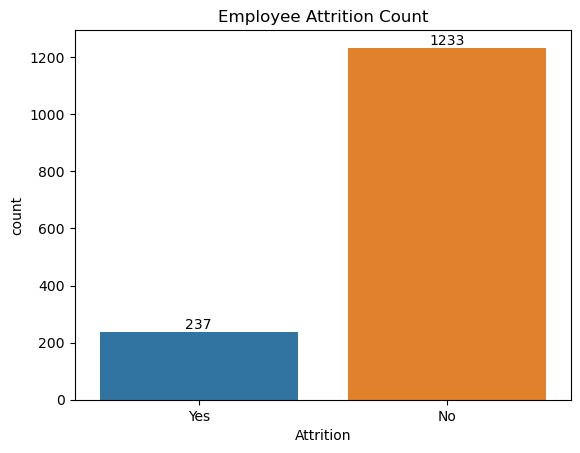

In [13]:
ax=sns.countplot(data=data_file,x='Attrition')
for bar in ax.containers:
    ax.bar_label(bar)
plt.title('Employee Attrition Count')    

Text(0.5, 1.0, 'Impact of Overtime on Employee Attrition')

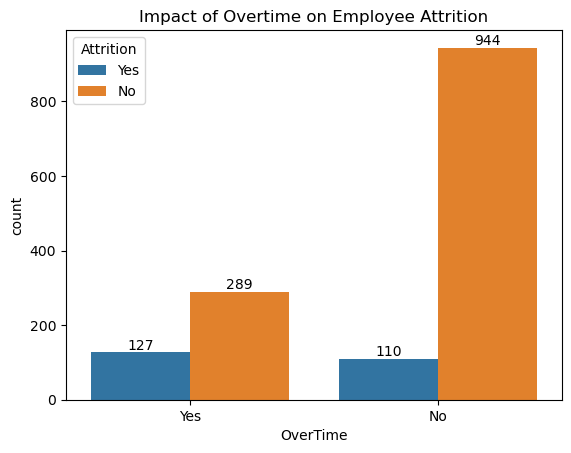

In [14]:
ax=sns.countplot(data=data_file,x='OverTime',hue='Attrition')
for bar in ax.containers:
    ax.bar_label(bar)
plt.title('Impact of Overtime on Employee Attrition')    

### From above graph we can take insights that

#### Attrition vs. Overtime
1. **Higher Attrition Among Overtime Workers:** Employees working overtime have a higher attrition rate (127 left) compared to those not working overtime (110 left), indicating a potential issue with overtime policies.
2. **Retention is Higher Among Non-Overtime Workers:** A significantly higher number of employees who do not work overtime (944) stay with the company, suggesting that reducing overtime could improve retention.

Text(0.5, 1.0, 'Employee Attrition by Department')

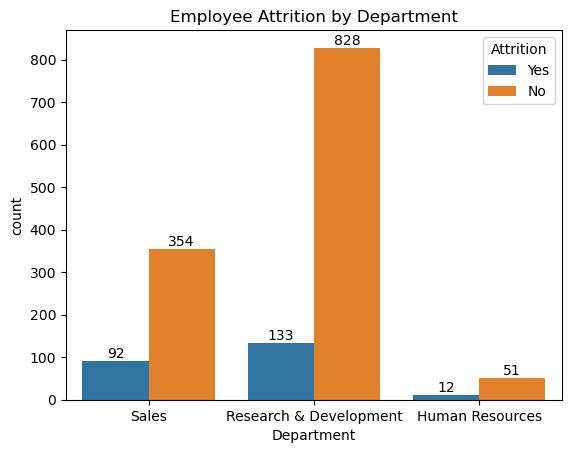

In [15]:
ax=sns.countplot(data=data_file,x='Department',hue='Attrition')
for bar in ax.containers:
    ax.bar_label(bar)
plt.title('Employee Attrition by Department')    

### From above graph we can take insights that

#### Graph 2: Attrition by Department
1. **Departmental Variations in Attrition:** The Sales and Research & Development departments have higher numbers of employees leaving (92 and 133, respectively), highlighting the need for tailored retention strategies for these departments.
2. **Effective Retention in Human Resources:** The Human Resources department shows the lowest attrition rate (12 left), possibly indicating effective retention practices that could be applied to other departments.

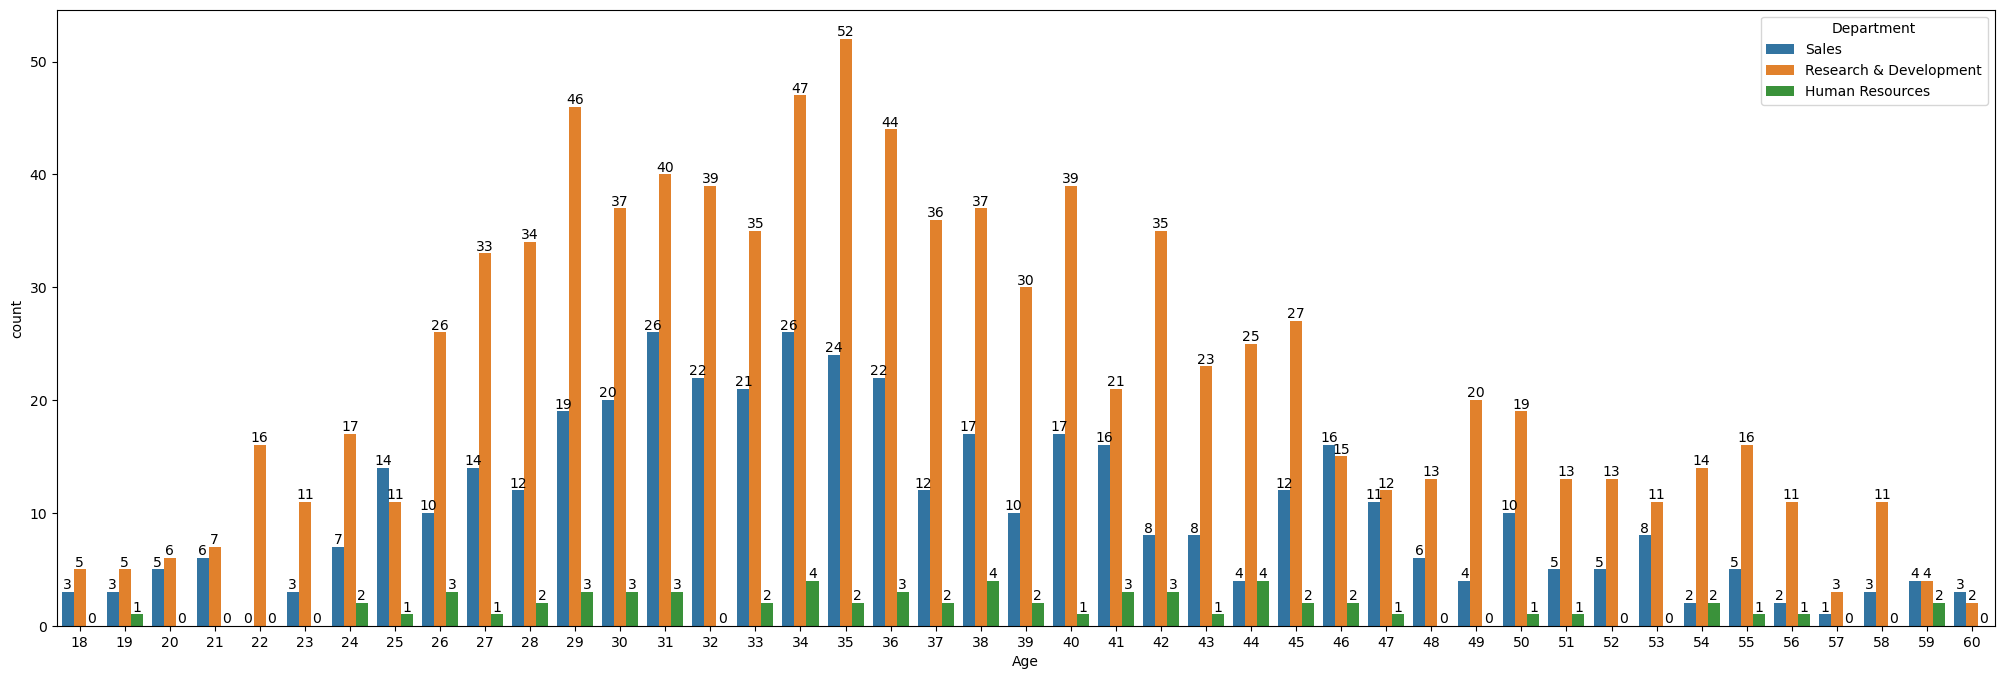

In [96]:
plt.figure(figsize=(25,8))
ax=sns.countplot(data=data_file,x='Age',hue='Department')
for bar in ax.containers:
    ax.bar_label(bar)

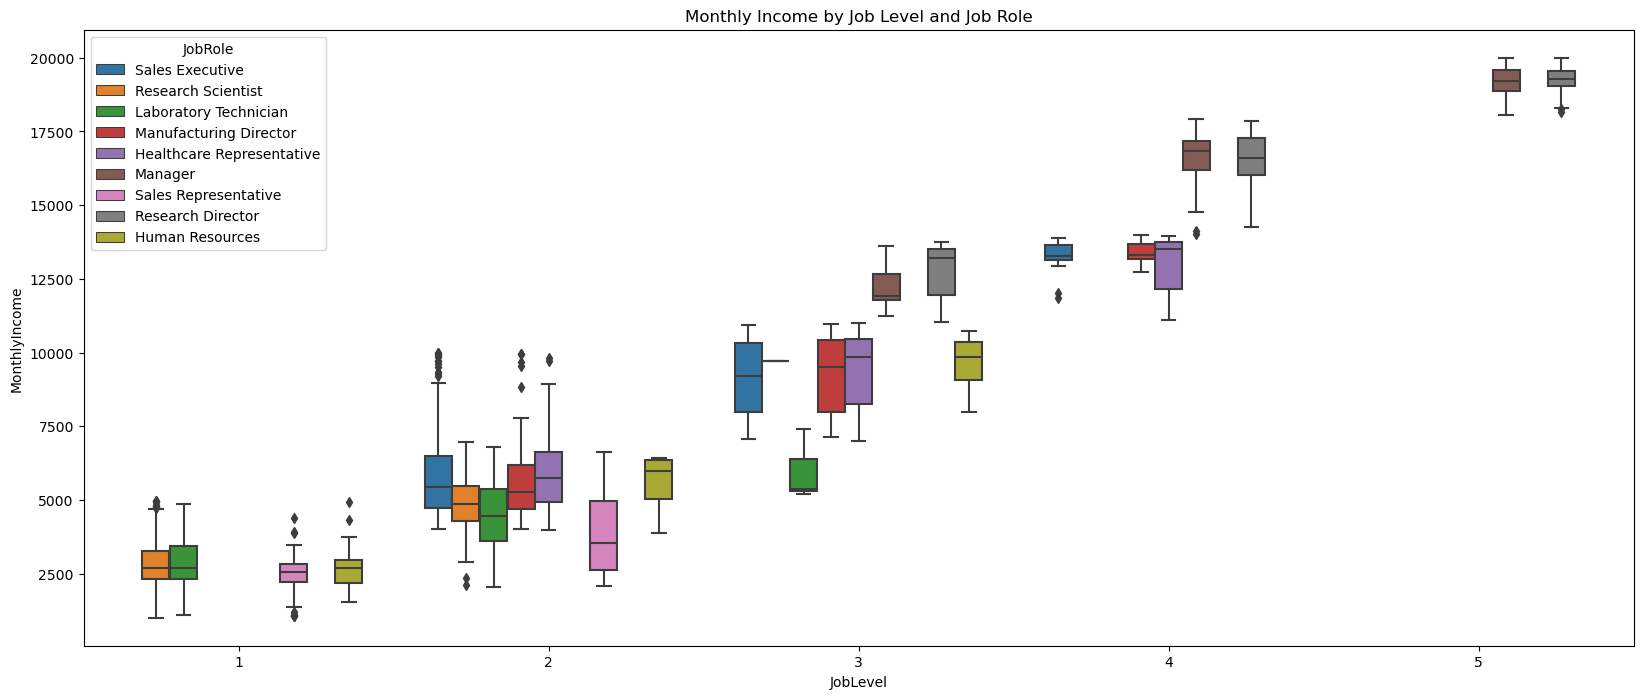

In [16]:
plt.figure(figsize=(20,8))
sns.boxplot(data=data_file, x='JobLevel', y='MonthlyIncome', hue='JobRole')
plt.title('Monthly Income by Job Level and Job Role')
plt.show()

### from below graph we can observed that 

1. **Income Increases with Job Level:**
   - Monthly income generally increases as job level increases from 1 to 5, indicating a positive correlation between job level and salary.

2. **Role-Based Income Variation:**
   - At each job level, there is a variation in income across different job roles. For example, at job level 1, 'Laboratory Technician' and 'Human Resources' have lower median incomes compared to 'Research Scientist' and 'Sales Executive'.

3. **High-Income Roles at Higher Levels:**
   - Roles like 'Research Director' and 'Manager' show consistently higher incomes, especially at job levels 4 and 5, suggesting these roles are more lucrative at higher job levels.


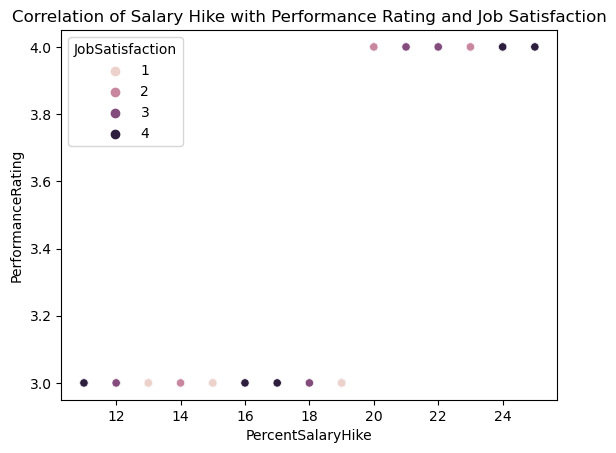

In [17]:
sns.scatterplot(data=data_file, x='PercentSalaryHike', y='PerformanceRating', hue='JobSatisfaction')
plt.title('Correlation of Salary Hike with Performance Rating and Job Satisfaction')
plt.show()

### Insights for Percent Salary Hike Correlation with Performance Ratings and Job Satisfaction

1. **Performance Rating Clusters:**
   - Performance ratings are clustered primarily around two distinct values: 3.0 and 4.0. This suggests that most employees receive these two ratings, with fewer variations in between.

2. **Salary Hikes and Performance Ratings:**
   - Employees with a performance rating of 3.0 receive salary hikes ranging from 11% to 15%.
   - Employees with a performance rating of 4.0 receive higher salary hikes, ranging from 20% to 25%. This indicates a positive correlation between higher performance ratings and larger salary increases.

3. **Job Satisfaction Levels:**
   - Job satisfaction, indicated by different shades of dots (1 to 4), does not show a clear pattern with percent salary hikes or performance ratings. This suggests that while salary hikes are linked to performance ratings, job satisfaction levels are more uniformly distributed across different salary hike percentages.

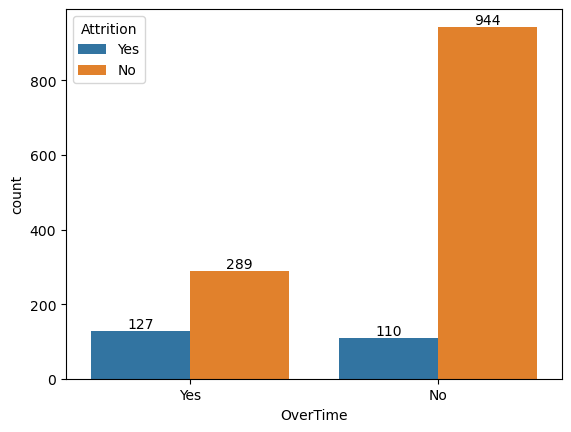

In [99]:
ax = sns.countplot(data=data_file, x='OverTime', hue='Attrition')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

### Insights for Overtime Impact on Attrition Rates

1. **Higher Attrition Among Overtime Workers:**
   - 127 employees who work overtime have left the company, compared to 110 employees who do not work overtime.
   - This suggests that employees who work overtime are more likely to leave the company.

2. **Retention is Higher Among Non-Overtime Workers:**
   - 944 employees who do not work overtime have stayed with the company, compared to 289 employees who work overtime.
   - Employees who do not work overtime have a significantly higher retention rate.

3. **Potential Impact of Overtime on Employee Turnover:**
   - The data indicates a correlation between working overtime and higher attrition rates. Reducing overtime or addressing issues related to overtime work might help improve employee retention.

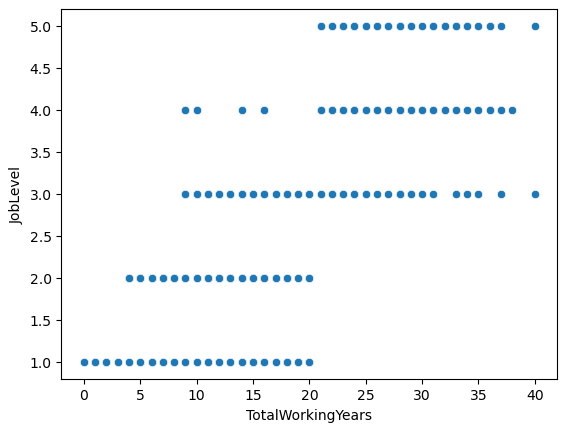

In [101]:
sns.scatterplot(data=data_file, x='TotalWorkingYears', y='JobLevel')
plt.show()

### Insights on the Relationship Between Total Working Years and Job Level

1. **Positive Correlation:**
   - There is a clear positive correlation between total working years and job level. Employees with more years of total working experience tend to hold higher job levels.

2. **Experience Clusters:**
   - Employees at **Job Level 1** generally have up to 10 years of working experience.
   - **Job Level 2** employees have a wider range of experience, typically between 5 to 15 years.
   - **Job Level 3** employees show a concentration of experience from 10 to 20 years.
   - **Job Level 4** and **Job Level 5** employees have more than 20 years of experience, with Job Level 5 mostly having over 25 years of experience.

3. **Career Progression:**
   - The data suggests that as employees gain more experience, they are likely to progress to higher job levels. This highlights the importance of experience in advancing to higher roles within the organization. 

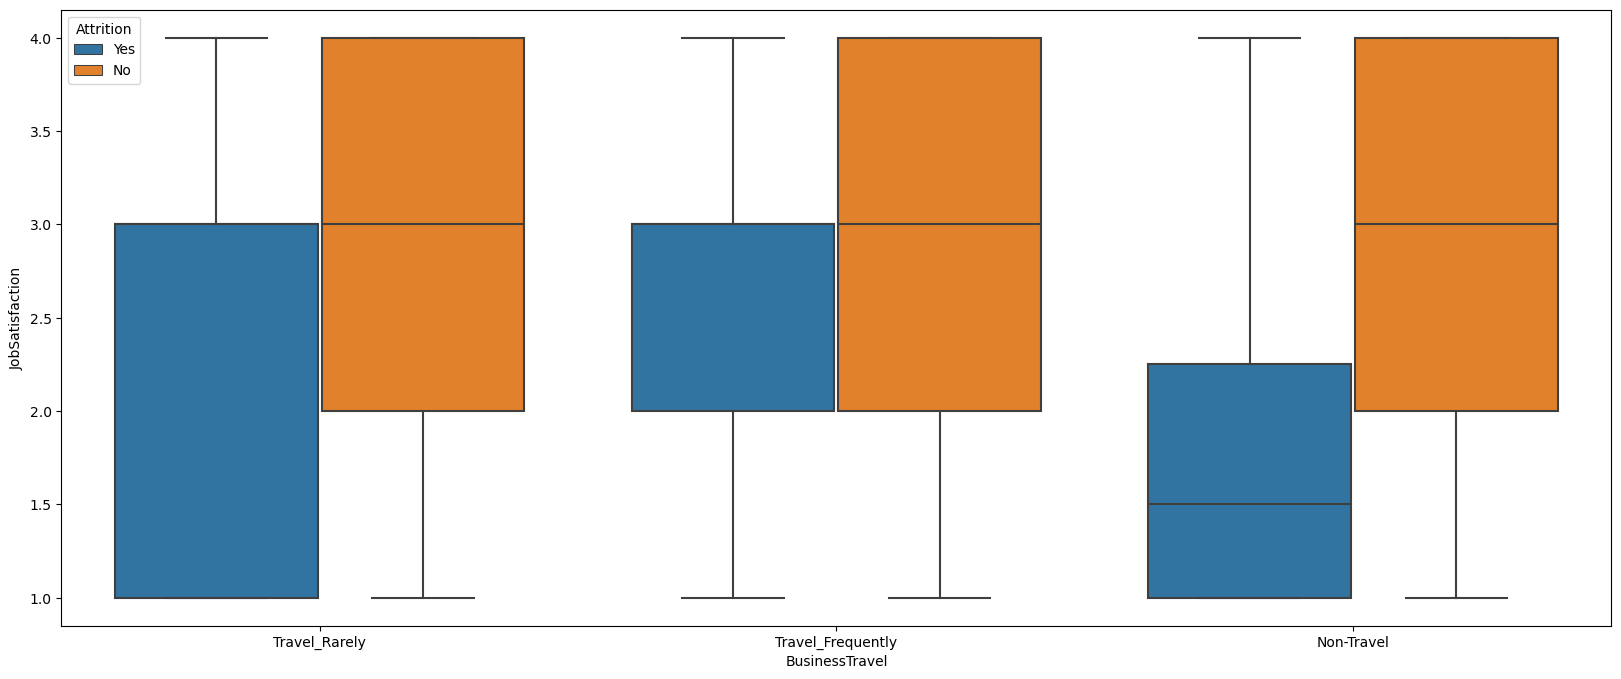

In [102]:
plt.figure(figsize=(20,8))
sns.boxplot(data=data_file, x='BusinessTravel', y='JobSatisfaction', hue='Attrition')
plt.show()

### Insights on the Impact of Business Travel Frequency on Job Satisfaction and Attrition

1. **Lower Job Satisfaction with Higher Travel Frequency:**
   - Employees who travel frequently for business have lower median job satisfaction compared to those who travel rarely or not at all. This trend is evident as job satisfaction for frequent travelers (who left) is significantly lower than those who rarely or never travel.

2. **Attrition and Job Satisfaction:**
   - Across all travel categories (Travel_Rarely, Travel_Frequently, Non-Travel), employees who left the company (Attrition = Yes) generally have lower job satisfaction compared to those who stayed (Attrition = No). This indicates a strong relationship between lower job satisfaction and higher attrition rates.

3. **Impact of Rare Travel:**
   - Employees who rarely travel for business have a wider range of job satisfaction levels, with those who stayed having higher job satisfaction compared to those who left. This suggests that rare travel might contribute to better job satisfaction among employees who stay with the company.

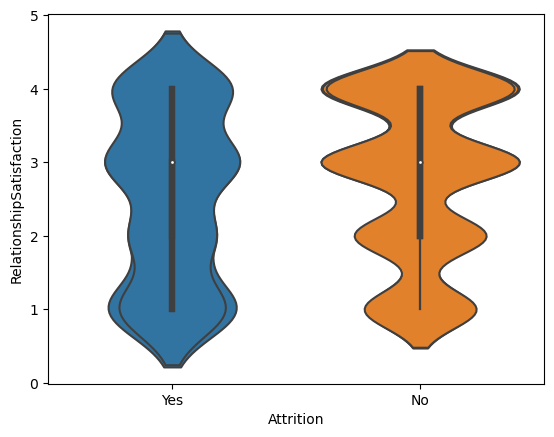

In [103]:
sns.violinplot(data=data_file, x='Attrition', y='RelationshipSatisfaction')
plt.show()

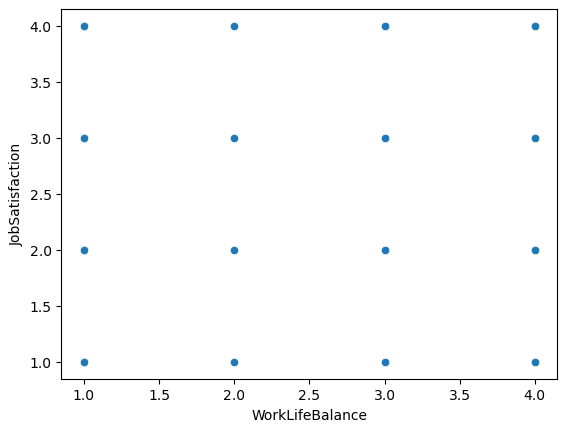

In [104]:
sns.scatterplot(data=data_file, x='WorkLifeBalance', y='JobSatisfaction')
plt.show()

### Insights on the Correlation between Work-Life Balance and Job Satisfaction

1. **Even Distribution Across Work-Life Balance Levels:**
   - Job satisfaction scores are evenly distributed across all levels of work-life balance, indicating that employees with varying perceptions of work-life balance report all possible levels of job satisfaction. This suggests no strong correlation between the two variables.

2. **Job Satisfaction Variability:**
   - Each level of work-life balance (from 1 to 4) includes a range of job satisfaction scores from 1 (lowest) to 4 (highest). This variability implies that factors other than work-life balance are likely influencing job satisfaction.

3. **Potential for Other Influences:**
   - Since no clear pattern or trend is visible in the scatter plot, it suggests that job satisfaction is influenced by multiple factors and cannot be solely explained by the work-life balance rating. Further investigation into other factors such as job role, income, or management style might be necessary to understand the drivers of job satisfaction.

In [105]:
data_file.drop(columns='Over18',inplace=True)

### Performing Encoding

In [106]:
#importing Encoder OneHot Encoder
from sklearn.preprocessing import OneHotEncoder
onehotencoder=OneHotEncoder()
list1=['Attrition','Gender','OverTime']
for column in list1:
    data_file[column]=onehotencoder.fit_transform(data_file[[column]]).toarray()

In [107]:
#importing Encoder Label Encoder
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
list2=['BusinessTravel','Department','EducationField','JobRole','MaritalStatus']
for column in list2:
    data_file[column]=labelencoder.fit_transform(data_file[[column]])

- We used for converting categorical data into numerical format
- The OneHotEncoder was used for the 'Attrition','Gender' and 'OverTime' column because it has only two unique values.
- The LabelEncoder was used for the 'BusinessTravel','Department','EducationField','JobRole' and 'MaritalStatus' column because it has more than two unique values.

In [108]:
data_file.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0.0,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,1.0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,0.0,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1.0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,1.0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [109]:
corr_matrix=data_file.corr()
corr_matrix

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,NaN,-0.010145,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,0.159205,1.000000,-0.000074,0.056652,-0.063991,-0.077924,0.031373,-0.026846,NaN,0.010577,...,0.045872,NaN,0.137145,0.171063,0.059478,0.063939,0.134392,0.160545,0.033019,0.156199
BusinessTravel,0.024751,-0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,NaN,-0.015578,...,-0.035986,NaN,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,NaN,-0.050990,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,-0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,NaN,-0.010895,...,-0.022414,NaN,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,-0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,NaN,0.032916,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,NaN,0.042070,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,-0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,NaN,-0.002516,...,-0.004378,NaN,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,0.010577,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,NaN,1.000000,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197


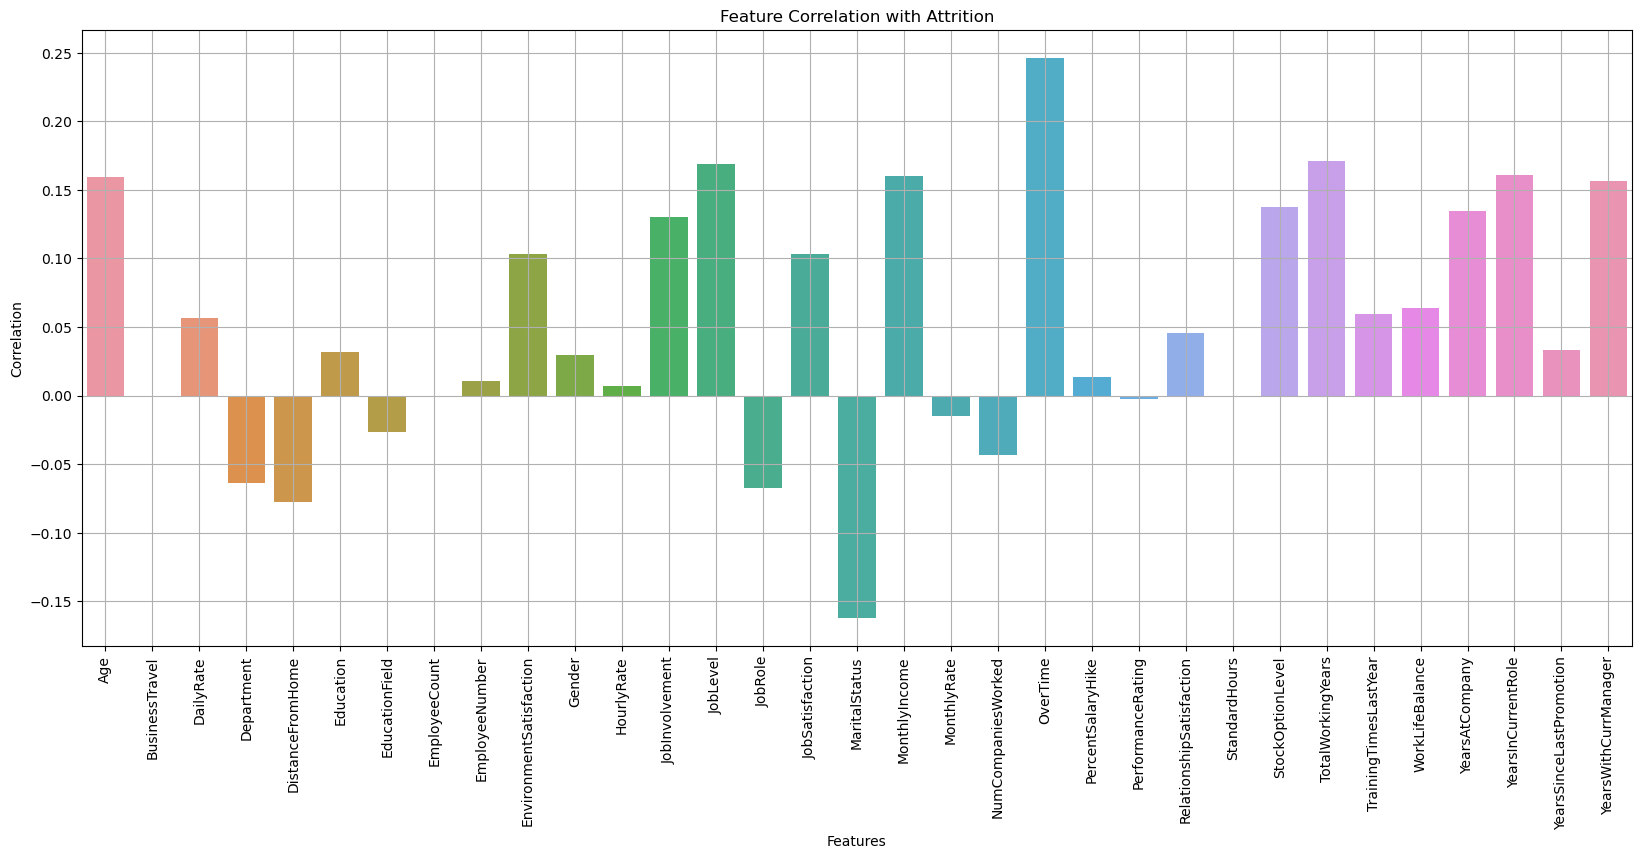

In [110]:
# Plot correlation with target variable
plt.figure(figsize=(20, 8))
sns.barplot(x=corr_matrix['Attrition'].drop('Attrition').index, y=corr_matrix['Attrition'].drop('Attrition').values)
plt.title("Feature Correlation with Attrition")
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

### Insights for Feature Correlation with Attrition

1. **Strong Positive Correlation:**
   - **OverTime:** Employees who work overtime show a high positive correlation with attrition.
   - **NumCompaniesWorked:** A higher number of companies worked at is positively correlated with higher attrition.
   - **TotalWorkingYears:** Longer total working years correlate positively with higher attrition.

2. **Strong Negative Correlation:**
   - **MonthlyIncome:** Higher monthly income is negatively correlated with attrition, suggesting that better-compensated employees are less likely to leave.
   - **JobSatisfaction:** Higher job satisfaction is associated with lower attrition rates.
   - **MaritalStatus:** Employees who are married tend to have lower attrition rates.

3. **Moderate Correlation:**
   - **JobLevel and JobRole:** Higher job levels and specific job roles (such as managerial positions) show a moderate positive correlation with lower attrition.
   - **YearsWithCurrManager and YearsInCurrentRole:** Longer tenure with the current manager or in the current role is moderately associated with lower attrition.

### Splitting data into training and test

In [111]:
x=data_file.drop('Attrition',axis=1)
y=data_file['Attrition']
print('Feature Dimension',x.shape)
print('Label Dimension',y.shape)

Feature Dimension (1470, 33)
Label Dimension (1470,)


#### Feature Scaling using Standard Scalarization

In [112]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,0.590048,0.742527,1.401512,-1.010909,-0.891688,-0.937414,0.0,-1.701283,-0.660531,...,-1.584178,0.0,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,-0.913194,-1.297775,-0.493817,-0.147150,-1.868426,-0.937414,0.0,-1.699621,0.254625,...,1.191438,0.0,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541
2,0.008343,0.590048,1.414363,-0.493817,-0.887515,-0.891688,1.316673,0.0,-1.696298,1.169781,...,-0.658973,0.0,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,-0.913194,1.461466,-0.493817,-0.764121,1.061787,-0.937414,0.0,-1.694636,1.169781,...,0.266233,0.0,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,0.590048,-0.524295,-0.493817,-0.887515,-1.868426,0.565311,0.0,-1.691313,-1.575686,...,1.191438,0.0,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,-0.913194,0.202082,-0.493817,1.703764,-0.891688,0.565311,0.0,1.721670,0.254625,...,0.266233,0.0,0.241988,0.735447,0.155707,0.338096,-0.327893,-0.615492,-0.679146,-0.314873
1466,0.227347,0.590048,-0.469754,-0.493817,-0.393938,-1.868426,0.565311,0.0,1.723332,1.169781,...,-1.584178,0.0,0.241988,-0.293077,1.707500,0.338096,-0.001333,0.764998,-0.368715,0.806541
1467,-1.086676,0.590048,-1.605183,-0.493817,-0.640727,0.085049,-0.937414,0.0,1.726655,-0.660531,...,-0.658973,0.0,0.241988,-0.678774,-2.171982,0.338096,-0.164613,-0.615492,-0.679146,-0.314873
1468,1.322365,-0.913194,0.546677,1.401512,-0.887515,0.085049,0.565311,0.0,1.728317,1.169781,...,1.191438,0.0,-0.932014,0.735447,0.155707,-1.077862,0.325228,0.488900,-0.679146,1.086895


### Feature scaling using PCA

In [113]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)
x=pca.fit_transform(x)

- We have scaled the data using the standard scaler method to ensure that all features contribute equally to the analysis, thus overcoming the issue of bias caused by varying scales of the features.
- We have used the PCA method to manage bias in the data by transforming the original features into a set of orthogonal components, which helps in reducing dimensionality and capturing the most important variance in the data

### Model Selection

In [114]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [115]:
#find the best random State
max_accuracy=0
best_state=0
random_state=range(1,200)
for state in random_state:
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=state)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>max_accuracy:
        max_accuracy=acc
        best_state=state
print("Maximum Accuracy_Score is=>",max_accuracy,"On Random State=>",best_state)


Maximum Accuracy_Score is=> 0.9070294784580499 On Random State=> 123


In [116]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=best_state)

#### Logistic Regression

In [117]:
LG=LogisticRegression()
LG.fit(x_train,y_train)
pred_lg=LG.predict(x_test)
print(LG)
print('Accuracy Score:-',accuracy_score(y_test,pred_lg))
print('Confusion Matrix:-',confusion_matrix(y_test,pred_lg))
print('Classification Report:-',classification_report(y_test,pred_lg))
print('---'*20)

LogisticRegression()
Accuracy Score:- 0.9070294784580499
Confusion Matrix:- [[ 25  32]
 [  9 375]]
Classification Report:-               precision    recall  f1-score   support

         0.0       0.74      0.44      0.55        57
         1.0       0.92      0.98      0.95       384

    accuracy                           0.91       441
   macro avg       0.83      0.71      0.75       441
weighted avg       0.90      0.91      0.90       441

------------------------------------------------------------


#### Random Forest Classifier

In [118]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_rfc=rfc.predict(x_test)
print(rfc)
print('Accuracy Score:-',accuracy_score(y_test,pred_rfc))
print('Confusion Matrix:-',confusion_matrix(y_test,pred_rfc))
print('Classification Report:-',classification_report(y_test,pred_rfc))
print('---'*20)

RandomForestClassifier()
Accuracy Score:- 0.8934240362811792
Confusion Matrix:- [[ 13  44]
 [  3 381]]
Classification Report:-               precision    recall  f1-score   support

         0.0       0.81      0.23      0.36        57
         1.0       0.90      0.99      0.94       384

    accuracy                           0.89       441
   macro avg       0.85      0.61      0.65       441
weighted avg       0.89      0.89      0.87       441

------------------------------------------------------------


#### K-Neighbors Classifier

In [119]:
from sklearn.neighbors import KNeighborsClassifier as KNN
knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
print(knn)
print('Accuracy Score:-',accuracy_score(y_test,pred_knn))
print('Confusion Matrix:-',confusion_matrix(y_test,pred_knn))
print('Classification Report:-',classification_report(y_test,pred_knn))
print('---'*20)

KNeighborsClassifier()
Accuracy Score:- 0.8820861678004536
Confusion Matrix:- [[  7  50]
 [  2 382]]
Classification Report:-               precision    recall  f1-score   support

         0.0       0.78      0.12      0.21        57
         1.0       0.88      0.99      0.94       384

    accuracy                           0.88       441
   macro avg       0.83      0.56      0.57       441
weighted avg       0.87      0.88      0.84       441

------------------------------------------------------------


#### ExtraTreesClassifier

In [120]:
from sklearn.ensemble import ExtraTreesClassifier 
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)
pred_etc=etc.predict(x_test)
print(etc)
print('Accuracy Score:-',accuracy_score(y_test,pred_etc))
print('Confusion Matrix:-',confusion_matrix(y_test,pred_etc))
print('Classification Report:-',classification_report(y_test,pred_etc))
print('---'*20)

ExtraTreesClassifier()
Accuracy Score:- 0.873015873015873
Confusion Matrix:- [[  1  56]
 [  0 384]]
Classification Report:-               precision    recall  f1-score   support

         0.0       1.00      0.02      0.03        57
         1.0       0.87      1.00      0.93       384

    accuracy                           0.87       441
   macro avg       0.94      0.51      0.48       441
weighted avg       0.89      0.87      0.82       441

------------------------------------------------------------


#### Support Vector Classifier

In [121]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
print(knn)
print('Accuracy Score:-',accuracy_score(y_test,pred_svc))
print('Confusion Matrix:-',confusion_matrix(y_test,pred_svc))
print('Classification Report:-',classification_report(y_test,pred_svc))
print('---'*20)

KNeighborsClassifier()
Accuracy Score:- 0.8888888888888888
Confusion Matrix:- [[ 10  47]
 [  2 382]]
Classification Report:-               precision    recall  f1-score   support

         0.0       0.83      0.18      0.29        57
         1.0       0.89      0.99      0.94       384

    accuracy                           0.89       441
   macro avg       0.86      0.59      0.61       441
weighted avg       0.88      0.89      0.86       441

------------------------------------------------------------


#### Decision Tree Classifier

In [122]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc=dtc.predict(x_test)
print(dtc)
print('Accuracy Score:-',accuracy_score(y_test,pred_dtc))
print('Confusion Matrix:-',confusion_matrix(y_test,pred_dtc))
print('Classification Report:-',classification_report(y_test,pred_dtc))
print('---'*20)

DecisionTreeClassifier()
Accuracy Score:- 0.7936507936507936
Confusion Matrix:- [[ 27  30]
 [ 61 323]]
Classification Report:-               precision    recall  f1-score   support

         0.0       0.31      0.47      0.37        57
         1.0       0.92      0.84      0.88       384

    accuracy                           0.79       441
   macro avg       0.61      0.66      0.62       441
weighted avg       0.84      0.79      0.81       441

------------------------------------------------------------


#### GradientBoostingClassifier

In [123]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
pred_gbc=gbc.predict(x_test)
print(gbc)
print('Accuracy Score:-',accuracy_score(y_test,pred_gbc))
print('Confusion Matrix:-',confusion_matrix(y_test,pred_gbc))
print('Classification Report:-',classification_report(y_test,pred_gbc))
print('---'*20)

GradientBoostingClassifier()
Accuracy Score:- 0.8956916099773242
Confusion Matrix:- [[ 22  35]
 [ 11 373]]
Classification Report:-               precision    recall  f1-score   support

         0.0       0.67      0.39      0.49        57
         1.0       0.91      0.97      0.94       384

    accuracy                           0.90       441
   macro avg       0.79      0.68      0.72       441
weighted avg       0.88      0.90      0.88       441

------------------------------------------------------------


### Cross Validation Score

In [124]:
from sklearn.model_selection import cross_val_score

#### Logistic Regressor

In [125]:
score=cross_val_score(LG,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is:',(accuracy_score(y_test,pred_lg)-score.mean())*100)

[ 0.12855691 -0.07063008 -0.03833233  0.03764321  0.08829357]
0.02910625481911635
Difference between R2 score and cross validation score is: 87.79232236389336


#### Random Forest Classifier

In [126]:
score1=cross_val_score(rfc,x,y)
print(score1)
print(score1.mean())
print('Difference between accuracy score and cross validation score is:',(accuracy_score(y_test,pred_rfc)-score1.mean())*100)

[0.84693878 0.84693878 0.8707483  0.85714286 0.85714286]
0.85578231292517
Difference between accuracy score and cross validation score is: 3.7641723356009127


#### K-Neighbors Classifier

In [127]:
score2=cross_val_score(knn,x,y)
print(score2)
print(score2.mean())
print('Difference between accuracy score and cross validation score is:',(accuracy_score(y_test,pred_knn)-score2.mean())*100)

[0.83673469 0.84013605 0.85034014 0.84013605 0.86394558]
0.8462585034013606
Difference between accuracy score and cross validation score is: 3.5827664399093018


#### ExtraTreesClassifier

In [128]:
score3=cross_val_score(etc,x,y)
print(score3)
print(score3.mean())
print('Difference between accuracy score and cross validation score is:',(accuracy_score(y_test,pred_etc)-score3.mean())*100)

[0.84013605 0.84353741 0.85034014 0.85034014 0.84353741]
0.845578231292517
Difference between accuracy score and cross validation score is: 2.7437641723356054


#### Decision Tree Classifier

In [129]:
score4=cross_val_score(dtc,x,y)
print(score4)
print(score4.mean())
print('Difference between accuracy score and cross validation score is:',(accuracy_score(y_test,pred_dtc)-score4.mean())*100)

[0.76870748 0.76190476 0.8537415  0.7755102  0.75510204]
0.7829931972789115
Difference between accuracy score and cross validation score is: 1.0657596371882128


#### GradientBoostingClassifier

In [130]:
score5=cross_val_score(gbc,x,y)
print(score5)
print(score5.mean())
print('Difference between accuracy score and cross validation score is:',(accuracy_score(y_test,pred_gbc)-score5.mean())*100)

[0.84353741 0.85714286 0.86734694 0.8537415  0.87755102]
0.8598639455782313
Difference between accuracy score and cross validation score is: 3.5827664399092907


##### Based on these observations, the KNeighborsClassifier seems to perform relatively well among the models tested, as it has a high mean cross- validation score and a small difference between accuracy score and cross-validation score

### Hyper Paramter Tuning

In [131]:
from sklearn.model_selection import GridSearchCV

In [132]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40],
    'p': [1, 2]
}

In [133]:
GCV=GridSearchCV(knn,param_grid,cv=5)

In [134]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [20, 30, 40],
                         'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [135]:
GCV.best_params_

{'algorithm': 'auto',
 'leaf_size': 20,
 'n_neighbors': 11,
 'p': 1,
 'weights': 'uniform'}

In [141]:
best_model=KNN(algorithm='auto',leaf_size=20,n_neighbors=11,p=1,weights='uniform')
best_model.fit(x_train,y_train)
pred_KNN=best_model.predict(x_test)
acc=accuracy_score(y_test,pred_KNN)
print(acc*100)

88.20861678004536


#### By adding parameter my model give 88 % accuracy

#### AUC ROC curve

In [142]:
from sklearn.metrics import roc_curve,auc,roc_auc_score,precision_recall_curve
from sklearn import metrics

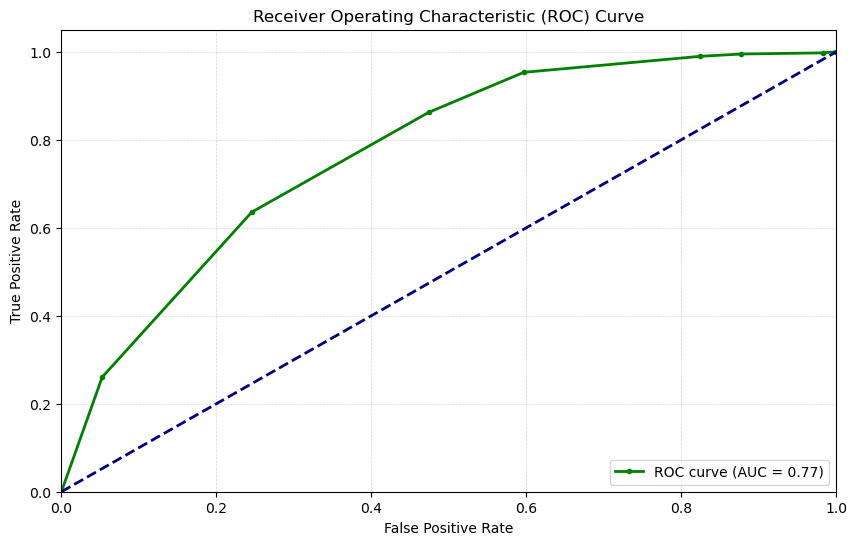

In [143]:
# Calculate probabilities for the positive class
y_prob = best_model.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})', marker='o', markersize=3)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
plt.show()

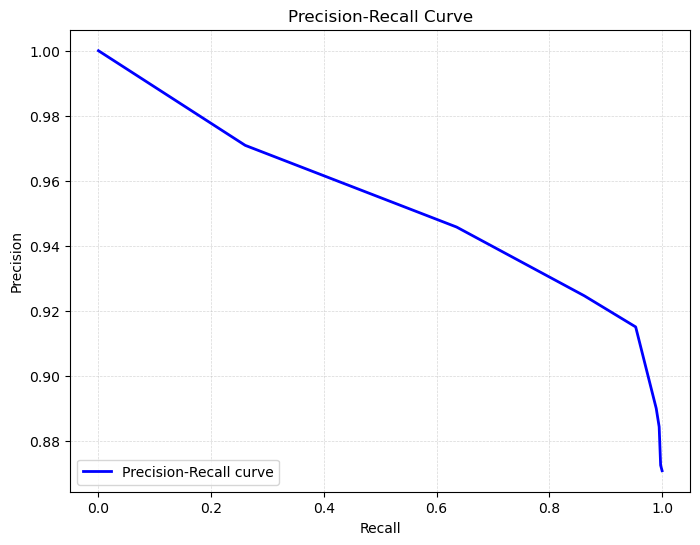

In [144]:
from sklearn.metrics import precision_recall_curve

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
plt.show()

### Saving the Model

In [145]:
#importing joblib and saving model
import joblib
joblib.dump(best_model,"HR Analysis Project.pkl")

['HR Analysis Project.pkl']

In [146]:
#Now loading file and checcking prediction 
model=joblib.load("HR Analysis Project.pkl")

In [147]:
prediction=model.predict(x_test)

In [148]:
Original=np.array(y_test)
df=pd.DataFrame()
df['Original']=Original
df['prediction']=prediction
df.head(20)

,Original,prediction
0,0.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
5,1.0,1.0
6,0.0,1.0
7,1.0,1.0
8,1.0,1.0
9,1.0,1.0


1. **Classification Techniques**: Employed supervised learning classification techniques.
  
2. **Exploratory Data Analysis (EDA)**: Followed a meticulous EDA process, including checks for duplicates, null values, and data type conversions for proper formatting.

3. **Initial Data Examination**: Conducted initial steps such as checking for duplicate records, handling null values, and ensuring proper data type conversion. Investigated the relationship between the target variable and independent variables.

4. **Data Visualization**: Utilized various graphs and visualization techniques to discern patterns and gain insights from the data.

5. **Outlier Detection and Removal**: Identified and removed outliers to improve the robustness of the models.

6. **Categorical Data Encoding**: Converted categorical data into numerical format using an encoder for better analysis.

7. **Hyperparameter Tuning**: Enhanced model performance through hyperparameter tuning to find optimal settings.

8. **Train-Test Split**: Split the dataset into training and testing sets to evaluate model performance effectively.

9. **Evaluation Techniques**: Assessed model performance using various evaluation techniques such as VIF Score and evaluating multiple models, including PCA and Standardization.

10. **Model Selection**: Identified KNeighborsClassifier as the best-performing model, achieving an impressive 88% accuracy rate.

11. **Evaluation Metrics Plotted**: Visualized model performance through AUC, ROC, and Precision curves to provide a comprehensive understanding of model efficacy.